# 01. Intro
Neste notebook estão as avaliações dos modelos em BPMN descobertos com o software *Apromore* a partir do log de eventos. Os dois modelos que serão avaliados são: 

> 1. **Modelo A**: Modelo com todos os arcos, gerado em BPMN no Apromore e convertido para Petri Net no PM4PY;

> 2. **Modelo B**: Modelo abstraído contendo 25% dos arcos, baseado na frequência de _case_, gerado em BPMN no Apromore e convertido para Petri Net no PM4PY.

> 2. **Modelo C**: Modelo em Petri Net gerado no PM4PY.


In [3]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt

### 01.1 Leitura do log
Subindo o log em `.xes` com a lib `PM4PY`. Note que o log será lido como um dataframe, que será útil nas análises posteriores.

In [ ]:
event_log = pm4py.read_xes("../_datasets/01_TRAFFIC_FINE_MANAGEMENT.xes")

### 01.2 Leitura dos modelos
Lendo os modelos em `.bpmn` com a lib `PM4PY`. Os modelos serão convertidos, também, para Petri Nets, para podermos analisar a métrica de fitness pela estratégia do Token Replay.

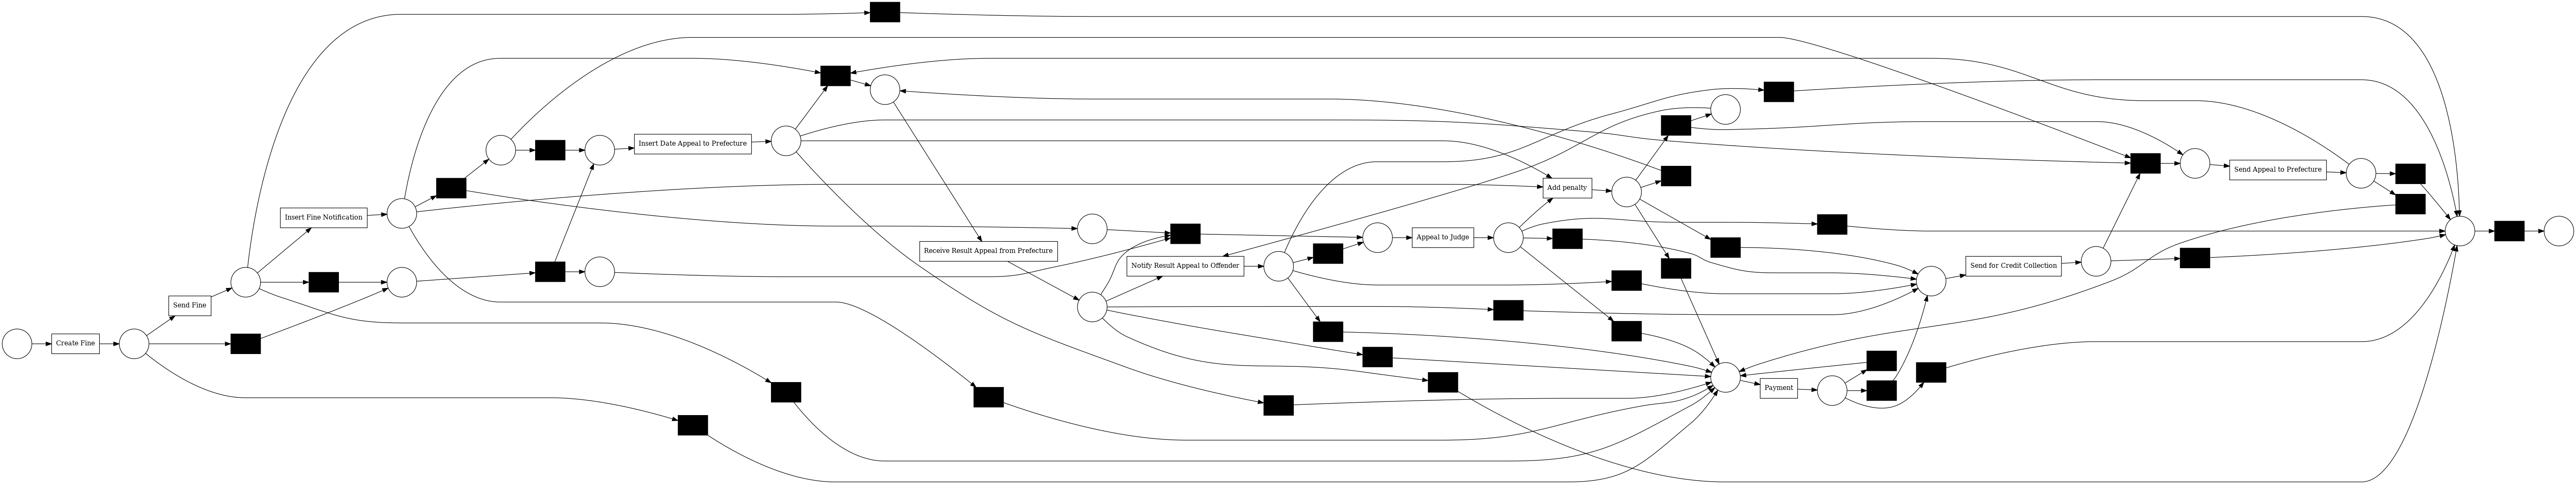

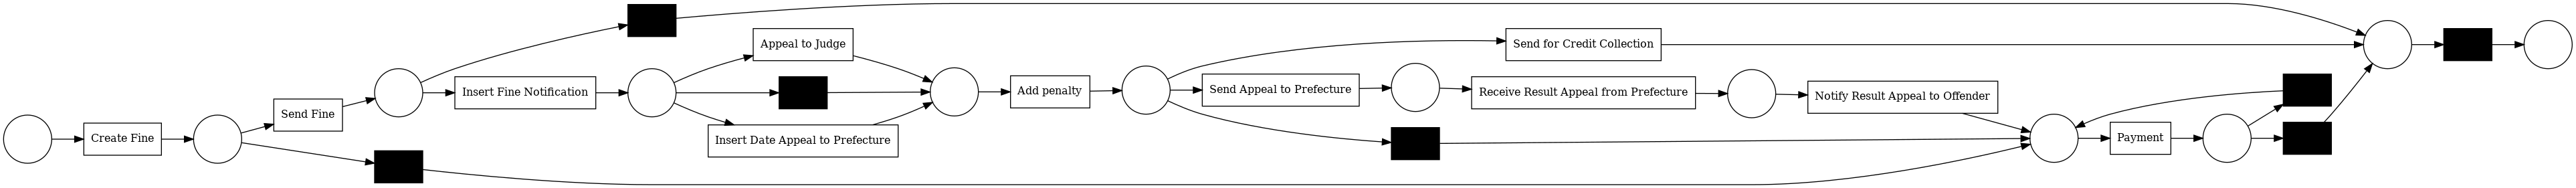

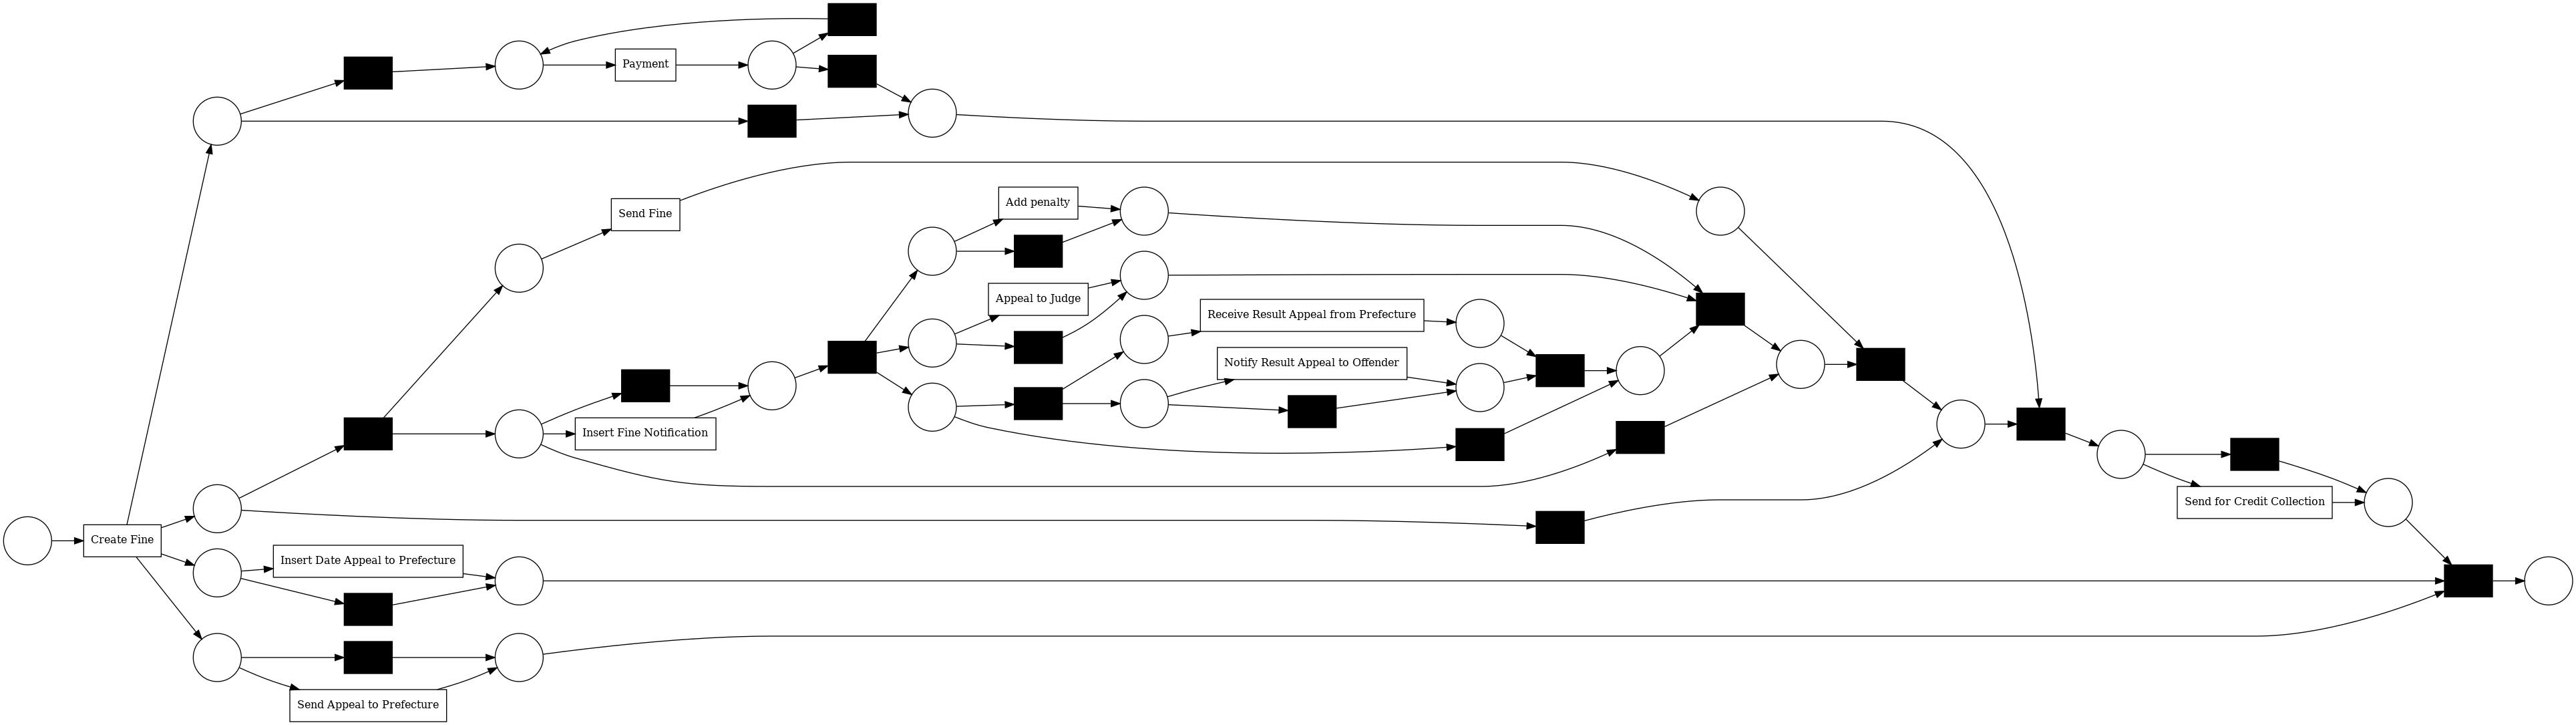

In [15]:
model_A_bpmn = pm4py.read_bpmn('./bpmn_models/Model_A.bpmn')
model_A_petri_net, initial_marking_A, final_marking_A = pm4py.convert_to_petri_net(model_A_bpmn)
pm4py.view_petri_net(model_A_petri_net)

model_B_bpmn = pm4py.read_bpmn('./bpmn_models/Model_B.bpmn')
model_B_petri_net, initial_marking_B, final_marking_B = pm4py.convert_to_petri_net(model_B_bpmn)
pm4py.view_petri_net(model_B_petri_net)

model_C_petri_net, initial_marking_C, final_marking_C = pm4py.read_pnml('./bpmn_models/Model_C.pnml')
pm4py.view_petri_net(model_C_petri_net)

# 02. Cálculo das métricas de qualidade dos modelos
A avaliação dos modelos descobertos será realizada por quatro métricas:

> 1. **Fitness**: o modelo descoberto deveria permitir o comportamento observado no log.

> 2. **Precisão**: O modelo descoberto não deveria permitir comportamento completamente não relacionado àquilo que é observado no log.

> 3. **Simplicidade**: O modelo descoberto deveria generalizar o comportamento observado no log.

> 4. **Generalização**: O modelo descoberto deve ser tão simples quanto possível.

### 02.1 Fitness 
O fitness será avaliado a partir da estratégia do token replay, aplicado a Petri Nets. 

In [ ]:
fitness_A = pm4py.fitness_token_based_replay(event_log, model_A_petri_net, initial_marking_A, final_marking_A)

fitness_B = pm4py.fitness_token_based_replay(event_log, model_B_petri_net, initial_marking_B, final_marking_B)

fitness_C = pm4py.fitness_token_based_replay(event_log, model_C_petri_net, initial_marking_C, final_marking_C)

In [7]:
all_fitness = pd.DataFrame([fitness_A, fitness_B, fitness_C], index=["Modelo A", "Modelo B", "Modelo C"])
all_fitness.rename(columns={'perc_fit_traces':'Porcentagem traces conformes', 'average_trace_fitness': 'Média do fitness por trace', 'log_fitness': 'Fitness do log', 'percentage_of_fitting_traces': 'Porcentagem de traces encaixados'}, inplace=True)
all_fitness

,Traces encaixados perfeitamente,Média do fitness por trace,Fitness do log,Porcentagem de traces encaixados
Modelo A,46.507282,0.947769,0.930974,46.507282
Modelo B,91.126554,0.988175,0.986785,91.126554
Modelo C,100.000000,1.000000,1.000000,100.000000


A partir da tabela disposta acima, percebemos que o Modelo B possui um fitness consideravelmente maior do que o Modelo A. Ou seja, o Modelo B explica melhor o comportamento do log. 

### 02.2 Precisão
A precisão será avaliado a partir da estratégia do token replay, aplicado a Petri Nets. 

In [ ]:
precision_A = pm4py.precision_token_based_replay(event_log, model_A_petri_net, initial_marking_A, final_marking_A)

precision_B = pm4py.precision_token_based_replay(event_log, model_B_petri_net, initial_marking_B, final_marking_B)

precision_C = pm4py.precision_token_based_replay(event_log, model_C_petri_net, initial_marking_C, final_marking_C)

In [9]:
all_precisions = pd.DataFrame([{"Precisão": precision_A}, {"Precisão": precision_B}, {"Precisão": precision_C}], index=["Modelo A", "Modelo B", "Modelo C"])
all_precisions

,Precisão
Modelo A,0.996745
Modelo B,0.946997
Modelo C,0.623841


A partir da tabela, percebemos que a precisão do Modelo A é maior. Ou seja, o Modelo A é mais específico e preciso ao log do que o Modelo B.

### 02.3 Simplicidade
A simplicidade será avaliado a partir das Petri Nets. 

In [10]:
simplicity_A = pm4py.algo.evaluation.simplicity.algorithm.apply(model_A_petri_net)

simplicity_B = pm4py.algo.evaluation.simplicity.algorithm.apply(model_B_petri_net)

simplicity_C = pm4py.algo.evaluation.simplicity.algorithm.apply(model_C_petri_net)

In [11]:
all_simplicities = pd.DataFrame([{"Simplicidade": simplicity_A}, {"Simplicidade": simplicity_B},  {"Simplicidade": simplicity_C}], index=["Modelo A", "Modelo B", "Modelo C"])
all_simplicities

,Simplicidade
Modelo A,0.522388
Modelo B,0.714286
Modelo C,0.632653


A partir da tabela, percebemos que a simplicidade do Modelo B é maior. Ou seja, o Modelo B é menos complexo  do que o Modelo A, portanto mais fácil de ser compreendido.

### 02.4 Generalização
A generalização será avaliado a partir das Petri Nets. 

In [ ]:
generalization_A = pm4py.algo.evaluation.generalization.algorithm.apply(event_log, model_A_petri_net, initial_marking_A, final_marking_B)

generalization_B = pm4py.algo.evaluation.generalization.algorithm.apply(event_log, model_B_petri_net, initial_marking_B, final_marking_B)

generalization_C = pm4py.algo.evaluation.generalization.algorithm.apply(event_log, model_C_petri_net, initial_marking_C, final_marking_C)

In [13]:
all_generalizations = pd.DataFrame([{"Generalização": generalization_A}, {"Generalização": generalization_B}, {"Generalização": generalization_C}], index=["Modelo A", "Modelo B", "Modelo C"])
all_generalizations

,Generalização
Modelo A,0.684225
Modelo B,0.988889
Modelo C,0.973949


A partir da tabela, percebemos que a generalização do Modelo B é consideravelmente maior. Ou seja, no Modelo B os elementos do modelo são visitados com mais frequência do que os do Modelo A.

# 03. Resumo das métricas
Nesta seção as métricas calculadas anteriomente serão unidas para melhor compreensão. 

### 03.1 Tabela de métricas

In [14]:
quality_metrics_model_A = {"Fitness": fitness_A['average_trace_fitness'], "Simplicidade": simplicity_A, "Generalização": generalization_A, "Precisão": precision_A }
quality_metrics_model_B = {"Fitness": fitness_B['average_trace_fitness'], "Simplicidade": simplicity_B, "Generalização": generalization_B, "Precisão": precision_B }
quality_metrics_model_C = {"Fitness": fitness_C['average_trace_fitness'], "Simplicidade": simplicity_C, "Generalização": generalization_C, "Precisão": precision_C }

all_metrics = pd.DataFrame([quality_metrics_model_A, quality_metrics_model_B, quality_metrics_model_C], index=["Modelo A", "Modelo B", "Modelo C"])
all_metrics

,Fitness,Simplicidade,Generalização,Precisão
Modelo A,0.947769,0.522388,0.684225,0.996745
Modelo B,0.988175,0.714286,0.988889,0.946997
Modelo C,1.000000,0.632653,0.973949,0.623841
